## **Data Clean and Sheet Merging**

In [44]:
import pandas as pd # Importing pandas library

In [122]:
# Load data into DataFrame
df1 = pd.read_csv('/Users/zhouxiaoyu/desktop/comics_update/0515/Clean_TINTIN_EmoPanelsOrdinal_05152024.xlsx - Sheet1.csv')
df0 = pd.read_csv('/Users/zhouxiaoyu/desktop/comics_update/MAST Corpus Organization - MAST.csv')

In [123]:
# Check the columns
print(df1.columns)
print(df0.columns)

Index(['Project ID', 'Project Name', 'Document Name', 'Global Region',
       'RegionSimplified', 'Country', 'Document Name.1', 'Publication Date',
       'Publisher', 'Format', 'CountryLang', 'LanguageFinal', 'Silent?',
       'Genre Simplified', 'StyleDetail', 'StyleBroad', 'Audience',
       'Document Directory', 'Page Number', 'PageOrdinal', 'Panel#',
       'ComicPanel#', 'TotalPanels', 'OrdinalPanel%', 'OrdinalPanel%Rounded2',
       'Region ID', 'Region Type', 'Region Vertices', 'Region Area',
       'Annotation ID', 'Taxonomy Path', 'Page Area', 'Relative Area(%)',
       'Counter', 'color', 'color.1', 'intensity', 'saturation', 'hue',
       'ValenceCAT', 'Valence#', 'Valence#ABS', 'Arousal'],
      dtype='object')
Index(['Unnamed: 0', 'Format', 'Comic_title', 'Untranslated Title',
       'Source Title', 'Author', 'Translator', 'Author_origin',
       'Author_country (current)', 'Global region', 'Country', 'Language',
       'Original Language (Translations)', 'Publisher', 'Ge

In [124]:
# Filter rows where the 'Uploaded to MAST' column is not null and create a new DataFrame
df_mast = df0[df0['Uploaded to MAST'].notnull()]

In [125]:
# Find duplicates in the 'Comic_title' column of df3
duplicates = df_mast[df_mast.duplicated(subset=['Comic_title'], keep=False)]

# Get the unique duplicate Comic_title names
duplicate_titles = duplicates['Comic_title'].unique()

# Display the duplicate Comic_title names
print(duplicate_titles)

['Little Tiger [Pichinahuel]' 'El Manque' 'Hope' 'Cake' 'Infection'
 '6People' 'Razor-man']


In [126]:
"""
Based on information from Google Sheets, I know that in df1, only 'Cake', and 'Hope' in 'Document Name'are duplicated. 
Since multiple duplicates present in both dataframes simultaneously would prevent successful merging, 
I opted to remove these two rows.
"""

# Remove rows in df1 where the 'Document Name' column has values 'Hope' or 'Cake'
df1 = df1[~df1['Document Name'].isin(['Hope', 'Cake'])]

# Remove rows in df3 where the 'Comic_title' column has values 'Hope' or 'Cake'
df_mast = df_mast[~df_mast['Comic_title'].isin(['Hope', 'Cake'])]

# Perform an inner join using 'Document Name' and 'Comic_title'
df_merged = pd.merge(df1, df_mast, left_on='Document Name', right_on='Comic_title', how='inner')

# Display the merged DataFrame
print(df_merged)

       Project ID    Project Name          Document Name Global Region  \
0              12  TINTIN Project  The Legend of Tteryel        Africa   
1              12  TINTIN Project  The Legend of Tteryel        Africa   
2              12  TINTIN Project  The Legend of Tteryel        Africa   
3              12  TINTIN Project  The Legend of Tteryel        Africa   
4              12  TINTIN Project  The Legend of Tteryel        Africa   
...           ...             ...                    ...           ...   
46267          12  TINTIN Project          Kaptan Onedin     West Asia   
46268          12  TINTIN Project          Kaptan Onedin     West Asia   
46269          12  TINTIN Project          Kaptan Onedin     West Asia   
46270          12  TINTIN Project          Kaptan Onedin     West Asia   
46271          12  TINTIN Project          Kaptan Onedin     West Asia   

      RegionSimplified Country_x        Document Name.1  Publication Date_x  \
0               Africa   Algeria

In [127]:
# Check if there are duplicate values in the merged DataFrame
duplicates = df_merged[df_merged.duplicated()]

# If there are no duplicates
if duplicates.empty:
    print("There are no duplicate values in the merged DataFrame.")
# If there are duplicates
else:
    print("There are duplicate values in the merged DataFrame.")
    print(duplicates)

There are no duplicate values in the merged DataFrame.


In [139]:
# Remove punctuation, spaces, and numbers from the '2.5.1 Panel Emotions' column and convert all values to uppercase
df_merged['2.5.1 Panel Emotions'] = df_merged['2.5.1 Panel Emotions'].str.replace(r'[^\w\s]|[\d]','', regex=True).str.replace(' ','').str.upper()

# Calculate the frequency of each value in the '2.5.1 Panel Emotions' column
emotions_counts = df_merged['2.5.1 Panel Emotions'].value_counts()

# Print the frequency counts
print('Panel Number')
print(emotions_counts)

Panel Number
XZ    11648
JB    10624
SD     9326
JW     8060
LZ     6603
NC       11
Name: 2.5.1 Panel Emotions, dtype: int64


In [144]:
# Count the number of unique 'Document Name'
emotions_doc_count = df_merged.groupby('2.5.1 Panel Emotions')['Document Name'].nunique()

# Convert Series to string and remove column name
emotions_doc_count_str = str(emotions_doc_count)
emotions_doc_count_str = emotions_doc_count_str.replace('2.5.1 Panel Emotions\n', '')

# Display the count results
print('Comics Number')
print(emotions_doc_count_str)

Comics Number
JB    158
JW    150
LZ    118
NC      1
SD    116
XZ    155
Name: Document Name, dtype: int64


In [132]:
# Save the DataFrame to a new CSV file
output_csv_path = '/Users/zhouxiaoyu/desktop/comics_update/team.csv'
df_merged.to_csv(output_csv_path, index=False) 

## **Data Analysis**

In [133]:
import matplotlib.pyplot as plt

# Filter for specific emotional labels
specific_people = df_merged[df_merged['2.5.1 Panel Emotions'].isin(['JW', 'JB', 'LZ', 'SD', 'XZ'])]

# Calculate the median, mean, and standard deviation for Valence and Arousal
valence_arousal_stats = specific_people.groupby('2.5.1 Panel Emotions').agg({
    'Valence#': ['median', 'mean', 'std'],
    'Arousal': ['median', 'mean', 'std']
})

# Print the calculated statistics
print(valence_arousal_stats)

                     Valence#                     Arousal                    
                       median      mean       std  median      mean       std
2.5.1 Panel Emotions                                                         
JB                        0.0 -0.186606  0.449492     2.0  2.160297  0.939676
JW                        0.0 -0.211849  0.507484     2.0  2.424069  1.214471
LZ                        0.0 -0.119340  0.619835     2.0  2.292746  0.923713
SD                       -0.5 -0.195743  0.645498     2.0  2.358246  1.015700
XZ                        0.0 -0.225962  0.621014     3.0  2.696429  1.016840


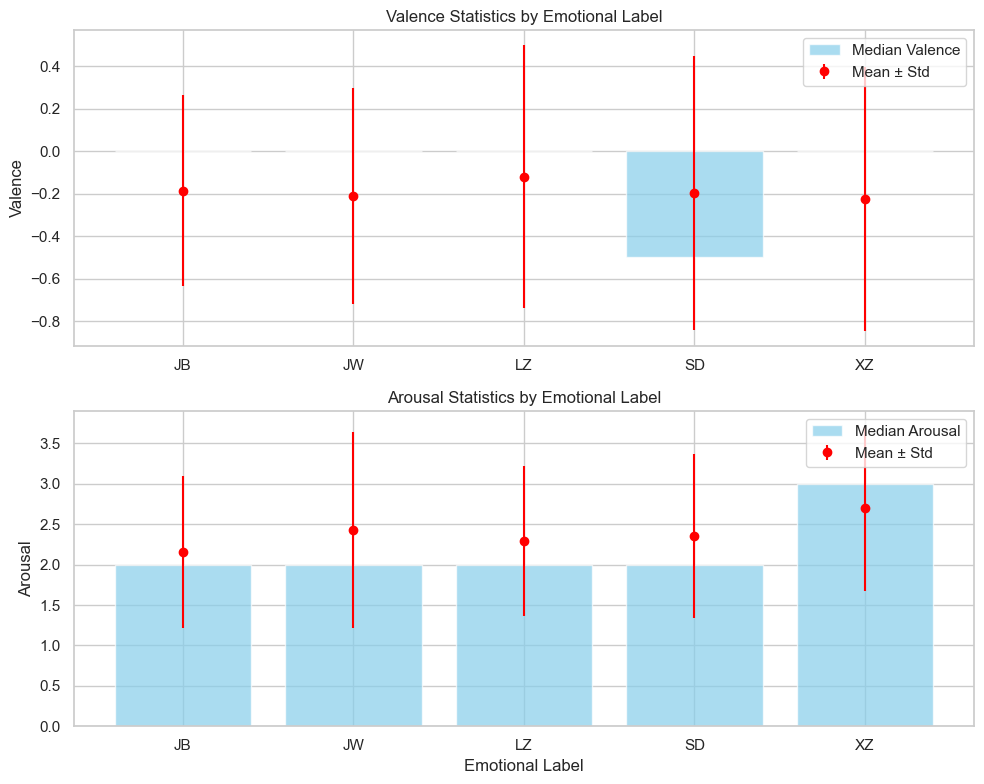

In [134]:
# Data for plotting
emotions = valence_arousal_stats.index.tolist()
valence_median = valence_arousal_stats[('Valence#', 'median')]
valence_mean = valence_arousal_stats[('Valence#', 'mean')]
valence_std = valence_arousal_stats[('Valence#', 'std')]
arousal_median = valence_arousal_stats[('Arousal', 'median')]
arousal_mean = valence_arousal_stats[('Arousal', 'mean')]
arousal_std = valence_arousal_stats[('Arousal', 'std')]

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Valence
ax[0].bar(emotions, valence_median, color='skyblue', alpha=0.7, label='Median Valence')
ax[0].errorbar(emotions, valence_mean, yerr=valence_std, fmt='o', color='red', label='Mean ± Std')
ax[0].set_title('Valence Statistics by Emotional Label')
ax[0].set_ylabel('Valence')
ax[0].legend()

# Arousal
ax[1].bar(emotions, arousal_median, color='skyblue', alpha=0.7, label='Median Arousal')
ax[1].errorbar(emotions, arousal_mean, yerr=arousal_std, fmt='o', color='red', label='Mean ± Std')
ax[1].set_title('Arousal Statistics by Emotional Label')
ax[1].set_ylabel('Arousal')
ax[1].set_xlabel('Emotional Label')
ax[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

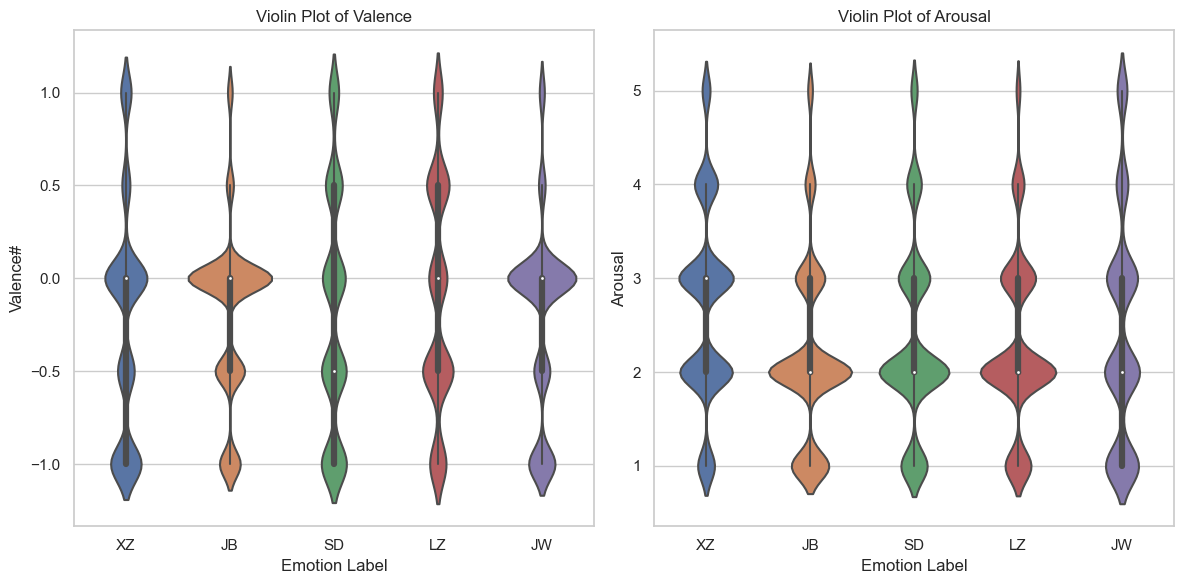

In [135]:
# Creating violin plots for Valence and Arousal
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(x='2.5.1 Panel Emotions', y='Valence#', data=specific_people, ax=axs[0])
axs[0].set_title('Violin Plot of Valence')
axs[0].set_ylabel('Valence#')
axs[0].set_xlabel('Emotion Label')

sns.violinplot(x='2.5.1 Panel Emotions', y='Arousal', data=specific_people, ax=axs[1])
axs[1].set_title('Violin Plot of Arousal')
axs[1].set_ylabel('Arousal')
axs[1].set_xlabel('Emotion Label')

plt.tight_layout()
plt.show()

Text(49.604796296296286, 0.5, 'Arousal')

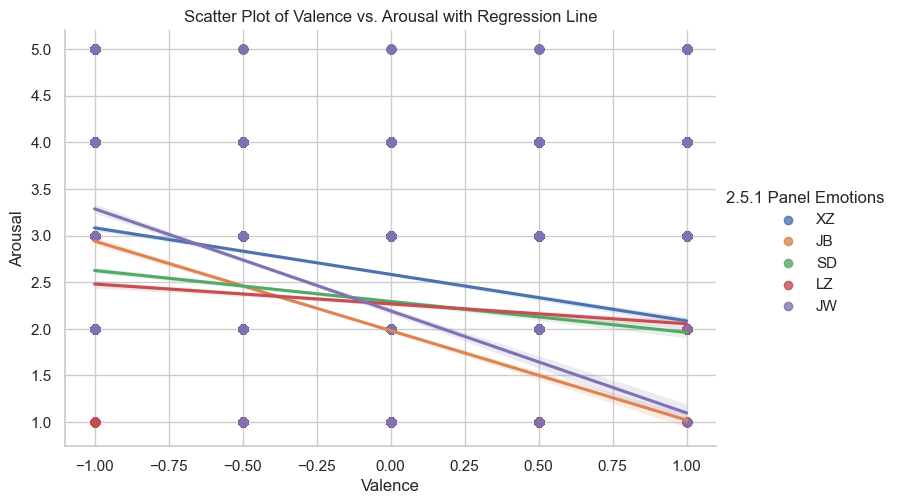

In [136]:
# Scatter plot with a fitted regression line
sns.lmplot(x='Valence#', y='Arousal', hue='2.5.1 Panel Emotions', data=specific_people, aspect=1.5)
plt.title('Scatter Plot of Valence vs. Arousal with Regression Line')
plt.xlabel('Valence')
plt.ylabel('Arousal')